In [56]:
# 导入必要的依赖库
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import MinMaxScaler

In [57]:
current_path = os.path.abspath('.')
print(current_path)

/home/zhouyuhua


In [58]:
data_path = current_path + '/tmp/pycharm_project_317/LSTM/'
dataset = pd.read_csv(data_path+'dataset.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [59]:
dataset.shape

(3020, 6)

In [60]:
# 检查数据是否有缺失值
train_set = dataset[:'2016'].iloc[:, 1:2].values # 训练集，获取到第一列的数据
test_set = dataset['2017':].iloc[:, 1:2].values # 测试集，获取到第一列的数据

In [61]:
train_set.shape

(2769, 1)

In [62]:
test_set.shape

(251, 1)

### 定义显示函数

In [63]:
def plot_predictions(test_result, predict_result):
    """
    :param test_result: 真实值
    :param predict_result: 预测值
    :return: 无
    """
    plt.plot(test_result, color='red', label='IBM True Stock Price')
    plt.plot(predict_result, color='blue', label='IBM predict Stock Price')
    plt.title('IBM Stock Price')
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend() # 给图加上图例
    plt.show()

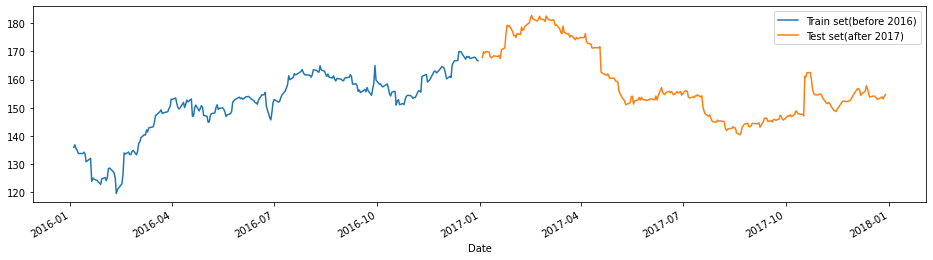

In [64]:
# md
### 第四步：绘制训练集合测试集的数据
dataset['High']['2016'].plot(figsize=(16, 4), legend=True)
dataset['High']['2017'].plot(figsize=(16, 4), legend=True)
plt.legend(['Train set(before 2016)', 'Test set(after 2017)'])
plt.show()

In [65]:
# 正则化：将每一维的特征映射到指定的区间:[0,1]
sc = MinMaxScaler(feature_range=[0, 1])
train_set_scaled = sc.fit_transform(train_set)

In [66]:
# 创建序列数据集（训练集和测试集）
# 60个时间为一个样本，1个输出
x_train = []
y_train = []
for i in range(60, 2769): # 训练集有2769条数据
    x_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) # numpy数据类型转换

In [67]:
x_train.shape

(2709, 60)

In [68]:
print(x_train[0])

[0.06065089 0.06029868 0.06311637 0.0781206  0.07262609 0.07171034
 0.07657087 0.07058326 0.0669907  0.06494787 0.075796   0.07361229
 0.06417301 0.05621302 0.05783319 0.05409975 0.05431107 0.05515638
 0.05543815 0.05677656 0.05846717 0.05388842 0.04811214 0.04233587
 0.04402649 0.0490279  0.04832347 0.05297267 0.05614258 0.05290223
 0.05325444 0.04909834 0.04994365 0.04797126 0.05431107 0.05212736
 0.04726684 0.04895745 0.04656241 0.04839391 0.04416737 0.0485348
 0.04719639 0.04825303 0.05395886 0.05663567 0.05853762 0.05959425
 0.06375035 0.06917442 0.06889265 0.06670893 0.06910397 0.07783883
 0.07565511 0.07276698 0.06889265 0.0656523  0.06656805 0.06769513]


In [69]:
# LSTM的输入：(samples, sequence_length, features)
# reshape: 训练集(2709,60)  ---> (2709, 60, 1)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [70]:
x_train.shape

(2709, 60, 1)

### 搭建LSTM模型，进行训练和预测

In [75]:


from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential

model = Sequential()
#LSTM 第一层
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

#LSTM 第二层
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

# LSTM 第三层
model.add(LSTM(128))
model.add(Dropout(0.2))

# Dense层
model.add(Dense(units=1))

In [80]:
# 模型编译
model.compile(optimizer='rmsprop', loss='mse')

# 模型训练
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
85/85 [==============================] - 22s 189ms/step - loss: 0.0275
Epoch 2/20
85/85 [==============================] - 16s 184ms/step - loss: 0.0100
Epoch 3/20
85/85 [==============================] - 16s 188ms/step - loss: 0.0073
Epoch 4/20
85/85 [==============================] - 17s 195ms/step - loss: 0.0061
Epoch 5/20
85/85 [==============================] - 14s 170ms/step - loss: 0.0049
Epoch 6/20
85/85 [==============================] - 14s 160ms/step - loss: 0.0042
Epoch 7/20
85/85 [==============================] - 14s 169ms/step - loss: 0.0042
Epoch 8/20
85/85 [==============================] - 15s 175ms/step - loss: 0.0035
Epoch 9/20
85/85 [==============================] - 15s 177ms/step - loss: 0.0034
Epoch 10/20
85/85 [==============================] - 16s 191ms/step - loss: 0.0031
Epoch 11/20
85/85 [==============================] - 16s 193ms/step - loss: 0.0026
Epoch 12/20
85/85 [==============================] - 16s 191ms/step - loss: 0.0025
Epoch 13/20
8

### 构建数据集，进行预测

In [83]:
dataset_total = pd.concat((dataset['High'][:'2016'], dataset['High']['2017':]), axis=0)

In [84]:
dataset_total.shape

(3020,)

In [85]:
print(dataset_total)

Date
2006-01-03     82.55
2006-01-04     82.50
2006-01-05     82.90
2006-01-06     85.03
2006-01-09     84.25
               ...  
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, Length: 3020, dtype: float64


In [86]:
inputs = dataset_total[len(train_set):].values

In [87]:
inputs = inputs.reshape(-1, 1)

In [88]:
inputs.shape

(251, 1)

In [89]:
inputs_scaled = sc.fit_transform(inputs)

### 构建测试集x_test,jinxinggujiayuce

In [92]:
dataset_total = pd.concat((dataset['High'][:'2016'], dataset['High']['2017':]), axis=0)
#获取输入的数据
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values

In [94]:
print(inputs)

[157.43 157.7  158.49 156.95 154.97 154.22 155.53 155.89 151.   152.45
 152.9  151.15 151.52 151.16 152.94 154.06 154.44 154.33 153.91 153.34
 153.74 153.64 156.11 155.93 155.56 161.16 161.34 161.86 159.15 159.55
 159.93 160.72 163.   163.   162.38 163.19 164.66 164.41 163.8  162.2
 160.29 161.15 160.79 165.18 166.   166.72 166.79 169.95 169.89 169.85
 169.11 167.26 168.25 167.94 168.23 167.49 167.98 167.74 166.99 166.7
 167.87 169.87 169.39 169.92 169.8  168.09 167.76 168.01 168.48 168.18
 168.59 167.45 170.64 171.25 176.   179.25 178.88 179.2  177.07 175.58
 175.7  174.97 176.34 175.98 178.62 177.5  177.8  178.87 179.9  180.13
 181.92 182.79 181.57 180.79 181.34 182.5  181.49 181.25 180.63 182.55
 181.88 181.32 180.99 181.29 180.95 179.25 179.49 178.06 176.82 176.28
 179.   176.79 176.18 176.23 175.06 175.67 175.5  174.16 175.   174.49
 174.59 174.95 174.87 174.96 176.33 173.47 172.93 172.56 171.23 171.2
 171.36 171.3  171.69 162.64 162.4  162.11 161.57 162.04 161.1  160.48
 160.59 1

In [95]:
# 归一化
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [96]:
inputs.shape

(311, 1)

In [98]:
# 准备测试集x_test,进行估价预测
x_test = []
for i in range(60, 311):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test) #
x_test.shape

(251, 60)

In [99]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(251, 60, 1)

In [100]:
predict_test = model.predict(x_test) # 预测

In [101]:
predict_test.shape

(251, 1)

In [102]:
predict_stock_price = sc.inverse_transform(predict_test)

In [120]:
print(predict_stock_price)

[[166.9859 ]
 [167.14085]
 [168.21689]
 [168.98186]
 [169.48634]
 [169.621  ]
 [168.944  ]
 [168.1461 ]
 [167.7549 ]
 [167.89787]
 [168.08301]
 [168.34735]
 [168.08536]
 [168.91603]
 [170.01027]
 [172.48816]
 [175.4715 ]
 [177.12607]
 [177.81   ]
 [177.17574]
 [175.95537]
 [175.13577]
 [174.62148]
 [174.98195]
 [175.36453]
 [176.51753]
 [176.97571]
 [177.14745]
 [177.47806]
 [178.07004]
 [178.58408]
 [179.47745]
 [180.37329]
 [180.51253]
 [180.15814]
 [179.98402]
 [180.3307 ]
 [180.38495]
 [180.30255]
 [180.00089]
 [180.39737]
 [180.58743]
 [180.5049 ]
 [180.25409]
 [180.15347]
 [180.02925]
 [179.41928]
 [179.00902]
 [178.33861]
 [177.4853 ]
 [176.73155]
 [177.22856]
 [177.13348]
 [176.71626]
 [176.31627]
 [175.67075]
 [175.42119]
 [175.32504]
 [174.86026]
 [174.74333]
 [174.57965]
 [174.50497]
 [174.59198]
 [174.65372]
 [174.70206]
 [175.18965]
 [174.60567]
 [173.74785]
 [172.9852 ]
 [172.12341]
 [171.58264]
 [171.42607]
 [171.43356]
 [171.60344]
 [168.49733]
 [165.24326]
 [163.07108]

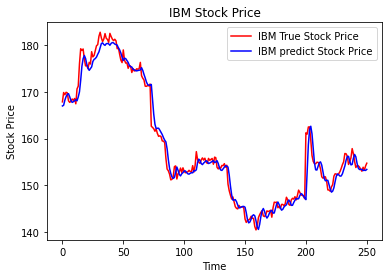

In [121]:
# 绘制测试集结果和预测结果
plot_predictions(test_set, predict_stock_price)

### 基于GRU实现预测股价

In [122]:
model_gru = Sequential()

In [123]:
from keras.layers import GRU

model_gru.add(GRU(50, return_sequences=True, input_shape=(x_test.shape[1], 1), activation='tanh'))

In [124]:
model_gru.add(Dropout(0.2))

In [125]:
model_gru.add(GRU(50, activation='tanh'))

In [126]:
model_gru.add(Dropout(0.2))

In [127]:
model_gru.add(Dense(1))

In [130]:
from tensorflow.keras.optimizers import SGD

# 模型编译
model_gru.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9), loss='mse')

/home/zhouyuhua/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [131]:
model_gru.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
85/85 [==============================] - 10s 74ms/step - loss: 0.0300
Epoch 2/20
85/85 [==============================] - 6s 73ms/step - loss: 0.0034
Epoch 3/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0030
Epoch 4/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0023
Epoch 5/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0022
Epoch 6/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0019
Epoch 7/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0017
Epoch 8/20
85/85 [==============================] - 6s 71ms/step - loss: 0.0016
Epoch 9/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0017
Epoch 10/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0016
Epoch 11/20
85/85 [==============================] - 6s 72ms/step - loss: 0.0015
Epoch 12/20
85/85 [==============================] - 6s 71ms/step - loss: 0.0015
Epoch 13/20
85/85 [=================

In [133]:
# 准备测试集X_test,进行股价预测
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test) # numpy 类型转换

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [134]:
GRU_predicted = model_gru.predict(X_test)

In [135]:
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted)

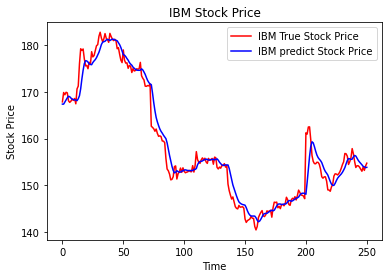

In [136]:
# 可视化
plot_predictions(test_set, GRU_predicted_stock_price)